In [1]:
!pip install kaggle
!kaggle datasets list


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)

100%|██████████| 163M/163M [00:01<00:00, 86.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1


In [3]:
import os

DATASET_PATH = "/root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1"

for root, dirs, files in os.walk(DATASET_PATH):
    print(root)
    print("Dirs:", dirs)
    print("Files:", files[:5])
    break


/root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1
Dirs: ['data']
Files: []


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [5]:
DATASET_PATH = "/root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1/data"

In [6]:


# List files in 'with_mask' folder
with_mask_files = os.listdir(os.path.join(DATASET_PATH, "with_mask"))
print("First 5 with_mask files:", with_mask_files[:5])
print("Last 5 with_mask files:", with_mask_files[-5:])

First 5 with_mask files: ['with_mask_2005.jpg', 'with_mask_2023.jpg', 'with_mask_1617.jpg', 'with_mask_2175.jpg', 'with_mask_3034.jpg']
Last 5 with_mask files: ['with_mask_1993.jpg', 'with_mask_3633.jpg', 'with_mask_911.jpg', 'with_mask_75.jpg', 'with_mask_2078.jpg']


In [7]:
without_mask_files = os.listdir(os.path.join(DATASET_PATH, "without_mask"))
print("First without mask file:", without_mask_files[:5])
print("Last without mask file:", without_mask_files[-5:])

First without mask file: ['without_mask_1278.jpg', 'without_mask_3195.jpg', 'without_mask_937.jpg', 'without_mask_1800.jpg', 'without_mask_65.jpg']
Last without mask file: ['without_mask_1303.jpg', 'without_mask_766.jpg', 'without_mask_1578.jpg', 'without_mask_2689.jpg', 'without_mask_838.jpg']


In [8]:
print("Number of masked images:", len(with_mask_files))
print("Number of non masked images:", len(without_mask_files))

Number of masked images: 3725
Number of non masked images: 3828


 # creating labels for the two classes of images

with mask -- 1
without mask -- 0

In [9]:
 # creating labels for the two classes of images
 with_mask_labels = [1]*len(with_mask_files)

 without_mask_labels = [0]*len(without_mask_files)


In [10]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])


[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(labels[0:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# displaying the images

In [14]:
DATASET_PATH = "/root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1/data"

# List files in the folder
with_mask_files = os.listdir(os.path.join(DATASET_PATH, "with_mask"))

# Pick the first image
image_path_masked = os.path.join(DATASET_PATH, "with_mask", with_mask_files[2])

In [15]:
DATASET_PATH = "/root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1/data"

# List files in the folder
without_mask_files = os.listdir(os.path.join(DATASET_PATH, "without_mask"))

# Pick the first image
image_path_unmasked = os.path.join(DATASET_PATH, "without_mask", without_mask_files[2])

In [16]:
import matplotlib.pyplot as plt

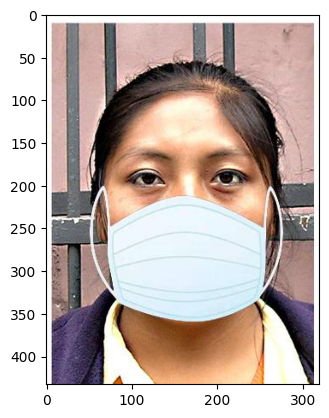

In [17]:
#displaying with mask images
img_mask = mpimg.imread(image_path_masked)
imgplot = plt.imshow(img_mask)
plt.show()

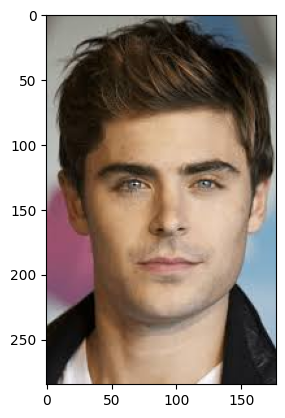

In [18]:
#displaying with mask images
img_mask = mpimg.imread(image_path_unmasked)
imgplot = plt.imshow(img_mask)
plt.show()

## image processing

In [19]:


DATASET_PATH = "/root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1/data"

IMG_SIZE = (128, 128)
data = []
labels = []

# Load with_mask images
with_mask_files = os.listdir(os.path.join(DATASET_PATH, "with_mask"))

for img_file in with_mask_files:
    img_path = os.path.join(DATASET_PATH, "with_mask", img_file)

    # Read image with OpenCV
    image = cv2.imread(img_path)

    if image is not None:
        # Convert BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Resize
        image = cv2.resize(image, IMG_SIZE)

        data.append(image)
        labels.append(1)  # 1 = with_mask

# Load without_mask images

without_mask_files = os.listdir(os.path.join(DATASET_PATH, "without_mask"))

for img_file in without_mask_files:
    img_path = os.path.join(DATASET_PATH, "without_mask", img_file)

    # Read image
    image = cv2.imread(img_path)

    if image is not None:
        # Convert BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Resize
        image = cv2.resize(image, IMG_SIZE)

        data.append(image)
        labels.append(0)  # 0 = without_mask

# Convert to NumPy arrays
data = np.array(data)
labels = np.array(labels)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Data shape: (7553, 128, 128, 3)
Labels shape: (7553,)


In [20]:
from sklearn.utils import shuffle

data, labels = shuffle(data, labels, random_state=42)


In [21]:
print("Total images:", len(data))
print("With mask:", sum(labels == 1))
print("Without mask:", sum(labels == 0))


Total images: 7553
With mask: 3725
Without mask: 3828


In [22]:
type(data)

numpy.ndarray

In [23]:
len(data)

7553

array([[[218, 218, 228],
        [218, 218, 228],
        [218, 218, 228],
        ...,
        [216, 219, 228],
        [216, 219, 228],
        [216, 219, 228]],

       [[218, 218, 228],
        [218, 218, 228],
        [218, 218, 228],
        ...,
        [216, 219, 228],
        [216, 219, 228],
        [216, 219, 228]],

       [[218, 218, 228],
        [218, 218, 228],
        [218, 218, 228],
        ...,
        [216, 219, 228],
        [216, 219, 228],
        [216, 219, 228]],

       ...,

       [[202, 205, 214],
        [202, 205, 214],
        [202, 205, 214],
        ...,
        [206, 209, 218],
        [205, 208, 217],
        [204, 207, 216]],

       [[202, 205, 214],
        [202, 205, 214],
        [202, 205, 214],
        ...,
        [205, 208, 217],
        [204, 207, 216],
        [203, 206, 215]],

       [[202, 205, 214],
        [202, 205, 214],
        [202, 205, 214],
        ...,
        [204, 207, 216],
        [203, 206, 215],
        [202, 205, 214]]], dtype=uint8)
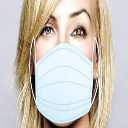

In [24]:
data[0]

In [25]:
data[1].shape

(128, 128, 3)

In [26]:
type(labels)

numpy.ndarray

In [50]:
x = data
y = labels

## TRAIN TEST SPLIT

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

In [29]:
# scaling your data
x_train_scaler = x_train/255
x_test_scaler = x_test/255



In [30]:
x_train_scaler[1]

array([[[0.98823529, 0.79215686, 0.02745098],
        [0.99607843, 0.8       , 0.03529412],
        [0.98431373, 0.78823529, 0.01960784],
        ...,
        [1.        , 0.76862745, 0.0627451 ],
        [0.99215686, 0.77254902, 0.0627451 ],
        [0.99215686, 0.77647059, 0.06666667]],

       [[0.96862745, 0.7254902 , 0.02745098],
        [1.        , 0.76078431, 0.05882353],
        [0.99607843, 0.76862745, 0.03921569],
        ...,
        [1.        , 0.78431373, 0.09411765],
        [0.99607843, 0.78823529, 0.09411765],
        [1.        , 0.8       , 0.10196078]],

       [[0.97647059, 0.72156863, 0.03529412],
        [0.99215686, 0.74901961, 0.04705882],
        [1.        , 0.77254902, 0.04705882],
        ...,
        [0.99215686, 0.78431373, 0.10980392],
        [0.98823529, 0.78431373, 0.10980392],
        [0.99215686, 0.78823529, 0.11372549]],

       ...,

       [[0.77254902, 0.59607843, 0.21568627],
        [0.28235294, 0.1372549 , 0.01176471],
        [0.14117647, 0

# building CNN(convolutional neural network)

In [31]:
import tensorflow as tf
from tensorflow import keras

In [58]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
#compile our model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# trainning

history = model.fit(x_train_scaler, y_train, validation_split=0.1, epochs=6 )

Epoch 1/6
170/170 ━━━━━━━━━━━━━━━━━━━━ 134s 770ms/step - accuracy: 0.7096 - loss: 0.6718 - val_accuracy: 0.8777 - val_loss: 0.3599
Epoch 2/6
170/170 ━━━━━━━━━━━━━━━━━━━━ 142s 769ms/step - accuracy: 0.8881 - loss: 0.3041 - val_accuracy: 0.9058 - val_loss: 0.2304
Epoch 3/6
170/170 ━━━━━━━━━━━━━━━━━━━━ 130s 764ms/step - accuracy: 0.9002 - loss: 0.2304 - val_accuracy: 0.9190 - val_loss: 0.2417
Epoch 4/6
170/170 ━━━━━━━━━━━━━━━━━━━━ 142s 761ms/step - accuracy: 0.9274 - loss: 0.2053 - val_accuracy: 0.9207 - val_loss: 0.1674
Epoch 5/6
170/170 ━━━━━━━━━━━━━━━━━━━━ 136s 797ms/step - accuracy: 0.9306 - loss: 0.1747 - val_accuracy: 0.9240 - val_loss: 0.1768
Epoch 6/6
170/170 ━━━━━━━━━━━━━━━━━━━━ 135s 792ms/step - accuracy: 0.9465 - loss: 0.1335 - val_accuracy: 0.9421 - val_loss: 0.1601


In [60]:
loss, accuracy = model.evaluate(x_test_scaler, y_test)
print("test accuracy:", accuracy)
print("test loss:", loss)

48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - accuracy: 0.9240 - loss: 0.2963
test accuracy: 0.9311714172363281
test loss: 0.2420557141304016


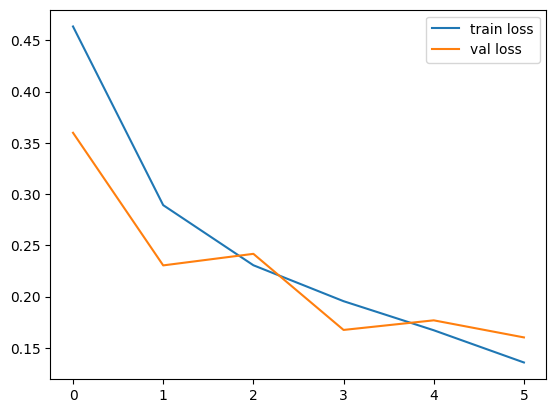

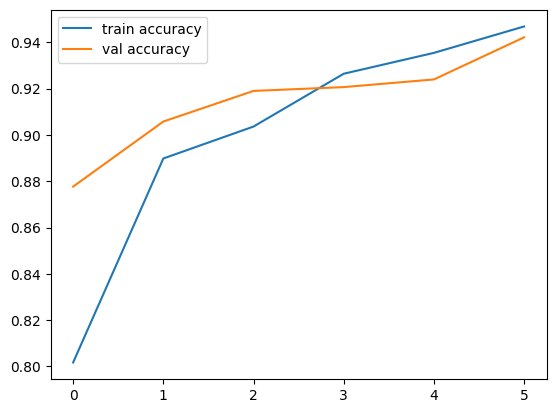

In [61]:
# plot loss
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend()
plt.show()
# plot accuray
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="val accuracy" )
plt.legend()
plt.show()

# predictive system

## image with mask

In [51]:
# upload image with mask
from google.colab import files
uploaded = files.upload()


Saving with_mask_35.jpg to with_mask_35.jpg


Enter path of the image/content/with_mask_35.jpg


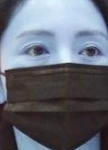

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[2.9883304e-06 9.9999702e-01]]
1
The person in the image is wearing a mask


In [63]:
input_image_path = input("Enter path of the image")

input_image = cv2.imread(input_image_path)

input_image = cv2.imread(input_image_path)

if input_image is None:
    raise ValueError("Image not found. Check the path.")

# Convert BGR → RGB (THIS IS CRITICAL)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resize/255

input_image_reshape = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshape)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print("The person in the image is wearing a mask")

else:
  print("the person in the image is not wearing a mask")



In [64]:
# upload image without mask
from google.colab import files
uploaded = files.upload()


Saving without_mask_22.jpg to without_mask_22.jpg


Enter path of the image/content/without_mask_22.jpg


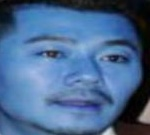

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[9.9978000e-01 2.2002617e-04]]
0
the person in the image is not wearing a mask


In [66]:
input_image_path = input("Enter path of the image")

input_image = cv2.imread(input_image_path)

input_image = cv2.imread(input_image_path)

if input_image is None:
    raise ValueError("Image not found. Check the path.")

# Convert BGR → RGB (THIS IS CRITICAL)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

cv2_imshow(input_image)


input_image_resize = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resize/255

input_image_reshape = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshape)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print("The person in the image is wearing a mask")

else:
  print("the person in the image is not wearing a mask")



48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 229ms/step


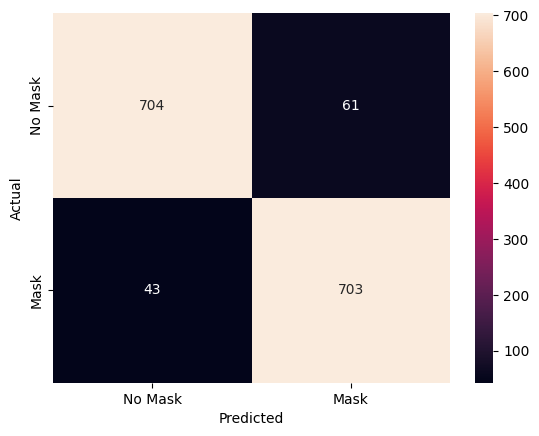

In [67]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(x_test_scaler)
y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_labels)

sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["No Mask", "Mask"],
            yticklabels=["No Mask", "Mask"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [68]:
print(classification_report(y_test, y_pred_labels,
                            target_names=["No Mask", "Mask"]))


              precision    recall  f1-score   support

     No Mask       0.94      0.92      0.93       765
        Mask       0.92      0.94      0.93       746

    accuracy                           0.93      1511
   macro avg       0.93      0.93      0.93      1511
weighted avg       0.93      0.93      0.93      1511



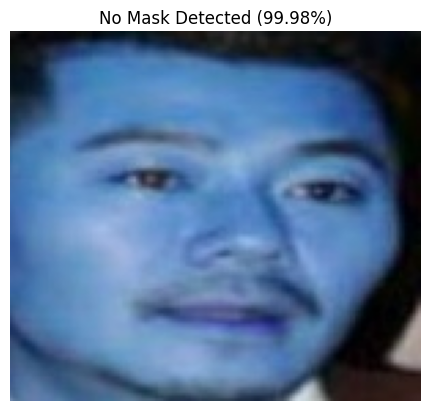

In [69]:
confidence = np.max(input_prediction) * 100

plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

if input_pred_label == 1:
    plt.title(f"Mask Detected ({confidence:.2f}%)")
else:
    plt.title(f"No Mask Detected ({confidence:.2f}%)")

plt.show()


In [70]:
model_save_path = 'mask_detection_model.keras'
model.save(model_save_path)
print(f"Model saved successfully to {model_save_path}")

Model saved successfully to mask_detection_model.keras


In [71]:
from google.colab import files

files.download(model_save_path)
print("Your model file should be downloading now.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Your model file should be downloading now.
